# Titanic Shipreck
On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.
so the objective of this task is to conduct a comprehensive analysis on the dataset and provide a report with respect to factor to contributes to a passenger surviving or not

In [1035]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('titanic_disaster.csv')

In [1036]:
data

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [1037]:
data.shape

(1309, 13)

In [1038]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1309 non-null   int64  
 1   PassengerId  1309 non-null   int64  
 2   Survived     891 non-null    float64
 3   Pclass       1309 non-null   int64  
 4   Name         1309 non-null   object 
 5   Sex          1309 non-null   object 
 6   Age          1046 non-null   float64
 7   SibSp        1309 non-null   int64  
 8   Parch        1309 non-null   int64  
 9   Ticket       1309 non-null   object 
 10  Fare         1308 non-null   float64
 11  Cabin        295 non-null    object 
 12  Embarked     1307 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 133.1+ KB


In [1039]:
data.describe()

,Unnamed: 0,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,369.478992,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,248.767105,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,0.000000,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,163.000000,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,327.000000,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,563.000000,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,890.000000,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [1040]:
data.columns

Index(['Unnamed: 0', 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [1041]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [1042]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [1043]:
data.drop(['PassengerId','Ticket'],axis=1,inplace=True)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,NaN,S
1305,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C105,C
1306,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,NaN,S
1307,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,NaN,S


In [1044]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [1125]:
data.Survived.value_counts()

Survived
0.0    549
1.0    342
Name: count, dtype: int64

In [1046]:
Survive=data['Survived']==1
Survive

0       False
1        True
2        True
3        True
4       False
        ...  
1304    False
1305    False
1306    False
1307    False
1308    False
Name: Survived, Length: 1309, dtype: bool

In [1047]:
Survived=data['Survived']==1
Survived

0       False
1        True
2        True
3        True
4       False
        ...  
1304    False
1305    False
1306    False
1307    False
1308    False
Name: Survived, Length: 1309, dtype: bool

In [1048]:
Survived=data[data['Survived']==1]
Survived

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
8,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,NaN,S
9,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...
875,1.0,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,7.2250,NaN,C
879,1.0,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,83.1583,C50,C
880,1.0,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,26.0000,NaN,S
887,1.0,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B42,S


In [1049]:
Not_Survived=data[~Survive]
Not_Survived

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S
5,0.0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,NaN,Q
6,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,E46,S
7,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,NaN,S
1305,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C105,C
1306,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,NaN,S
1307,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,NaN,S


In [1050]:
data.Sex.value_counts()

Sex
male      843
female    466
Name: count, dtype: int64

In [1051]:
data.Pclass.value_counts()

Pclass
3    709
1    323
2    277
Name: count, dtype: int64

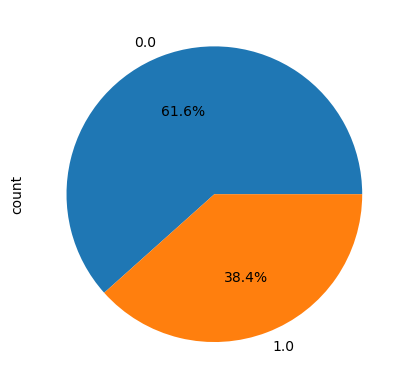

In [1052]:
data.Survived.value_counts()
data.Survived.value_counts().plot(kind='pie',autopct='%1.1f%%');

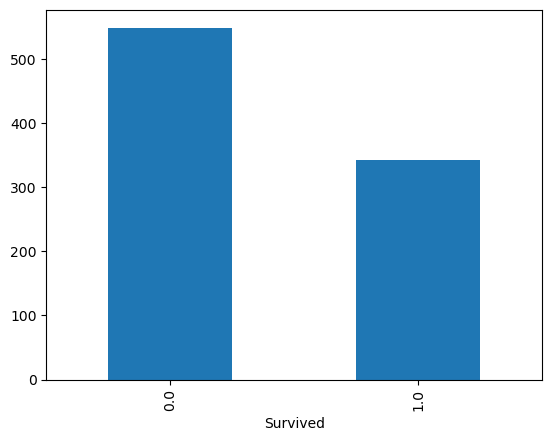

In [1053]:
data.Survived.value_counts()
data.Survived.value_counts().plot(kind='bar');

In [1054]:
data['Cabin'].nunique()

186

In [1055]:
data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [1056]:
data['Name'].nunique()

1307

In [1057]:
data['Age'].mean()

29.881137667304014

In [1058]:
data.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.25,NaN,S


In [1059]:
##1.Survival rate:
#What is the overall percentage of people that survived?(Survival rate)
Survived_counts=data['Survived'].value_counts()
percentage_survived=(Survived_counts[1]/Survived_counts.sum())*100
print(f'Percentage of people that survived: {percentage_survived:.2f}%')

Percentage of people that survived: 38.38%


In [1060]:
#What is the overall percentage of people that did not survive?(Survival rate)
Survived_counts=data['Survived'].value_counts()
percentage_not_survived=(Survived_counts[0]/Survived_counts.sum())*100
print(f'Percentage of people that did not survive: {percentage_not_survived:.2f}%')

Percentage of people that did not survive: 61.62%


In [1061]:
Survived_counts[1]

342

In [1062]:
data['Sex'].value_counts()

Sex
male      843
female    466
Name: count, dtype: int64

In [1063]:
data['Survived'].value_counts()

Survived
0.0    549
1.0    342
Name: count, dtype: int64

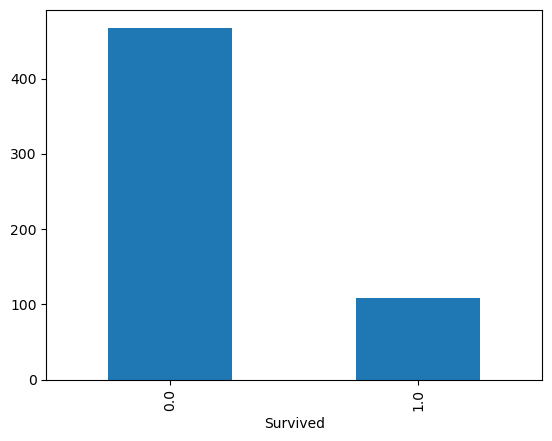

In [1064]:
#How does the survival rate differ between genders?
x=data['Sex']=='male'
data[x]['Survived'].value_counts().plot(kind='bar');

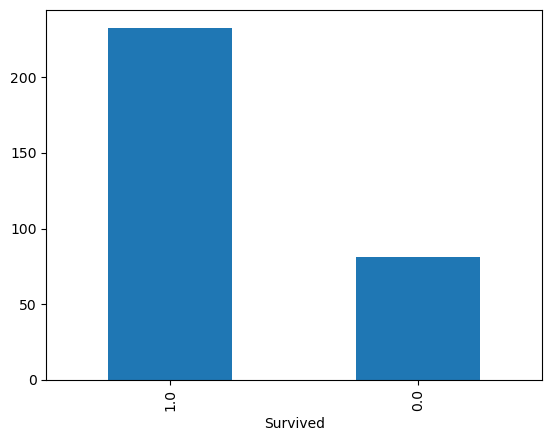

In [1065]:
#How does the survival rate differ between genders?
y=data['Sex']=='female'
data[y]['Survived'].value_counts().plot(kind='bar');

In [1127]:
# OR
Survival_by_gender=data.groupby('Sex')['Survived'].mean()*100
Survival_by_gender

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

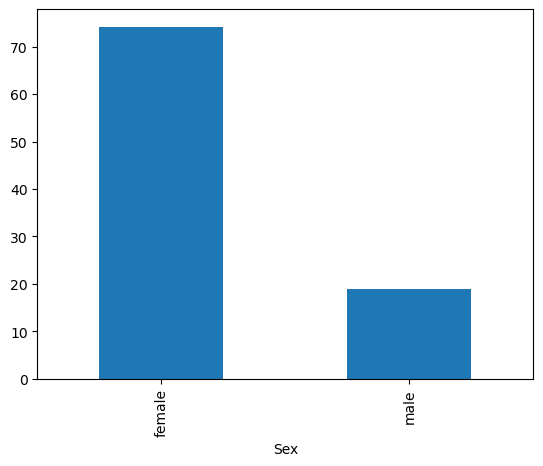

In [1130]:
Survival_by_gender.plot(kind='bar');

In [1067]:
data[~x]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
8,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,NaN,S
9,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...
1300,NaN,3,"Peacock, Miss. Treasteall",female,3.0,1,1,13.7750,NaN,S
1301,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,7.7500,NaN,Q
1302,NaN,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,90.0000,C78,Q
1303,NaN,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,7.7750,NaN,S


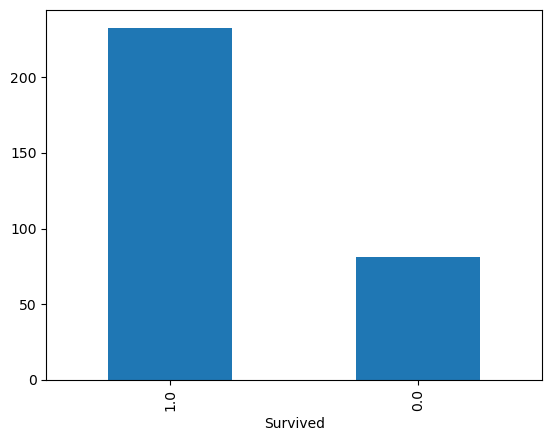

In [1068]:
x=data['Sex']=='male'
data[~x]['Survived'].value_counts().plot(kind='bar');

In [1069]:
x = data[data['Survived']==1]
x.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S


In [1070]:
x[x['Sex'] == 'male']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
17,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,13.0000,NaN,S
21,1.0,2,"Beesley, Mr. Lawrence",male,34.0,0,0,13.0000,D56,S
23,1.0,1,"Sloper, Mr. William Thompson",male,28.0,0,0,35.5000,A6,S
36,1.0,3,"Mamee, Mr. Hanna",male,NaN,0,0,7.2292,NaN,C
55,1.0,1,"Woolner, Mr. Hugh",male,NaN,0,0,35.5000,C52,S
...,...,...,...,...,...,...,...,...,...,...
838,1.0,3,"Chip, Mr. Chang",male,32.0,0,0,56.4958,NaN,S
839,1.0,1,"Marechal, Mr. Pierre",male,NaN,0,0,29.7000,C47,C
857,1.0,1,"Daly, Mr. Peter Denis",male,51.0,0,0,26.5500,E17,S
869,1.0,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,11.1333,NaN,S


In [1071]:
#Difference in survival rate in class
data.Pclass.value_counts()

Pclass
3    709
1    323
2    277
Name: count, dtype: int64

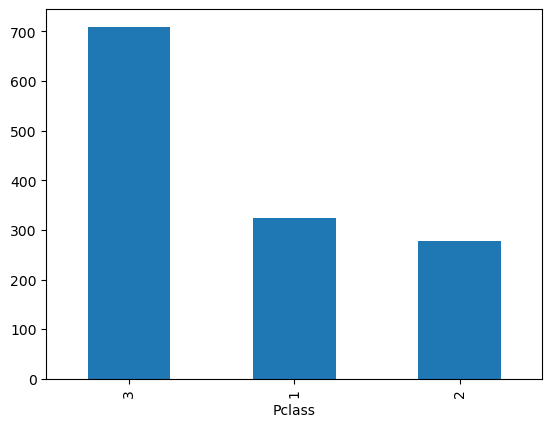

In [1072]:
data.Pclass.value_counts().plot(kind='bar');

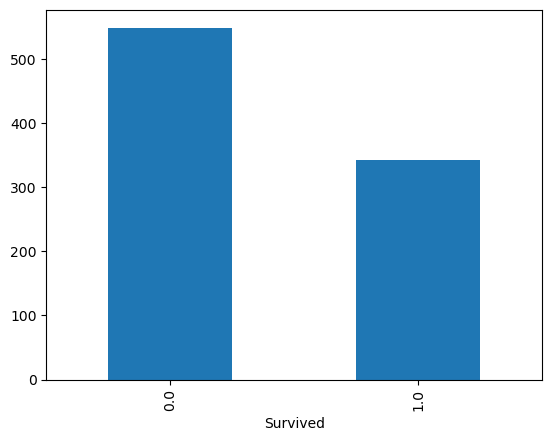

In [1073]:
data['Survived'].value_counts().plot(kind='bar');

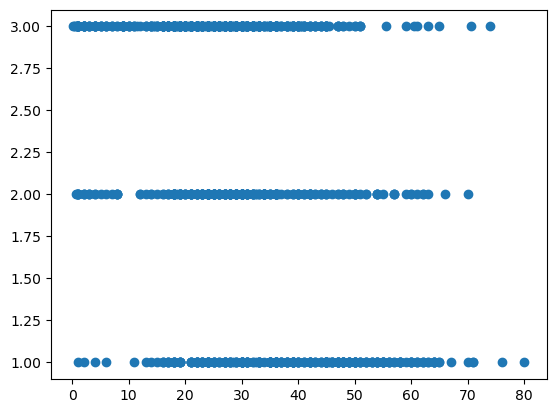

In [1074]:
##2 Age Distribution
#Age distribution on the Titanic
plt.scatter(data['Age'],data['Pclass']);

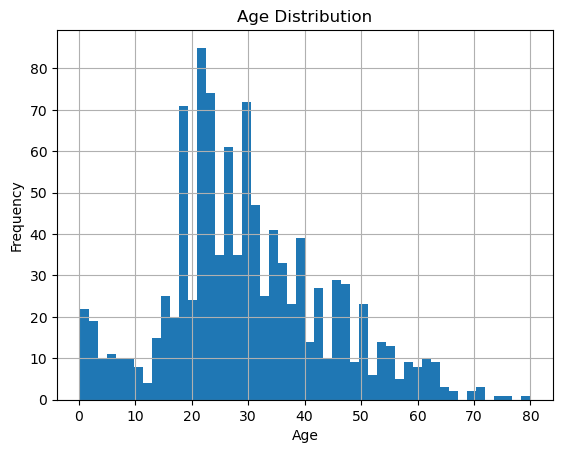

In [1136]:
data['Age'].hist(bins=50,grid=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency');

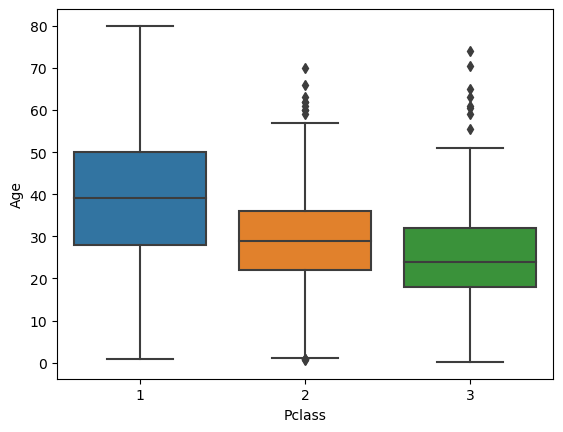

In [1076]:
#how the age distribution differ between classes
sns.boxplot(x='Pclass',y='Age',data=data);

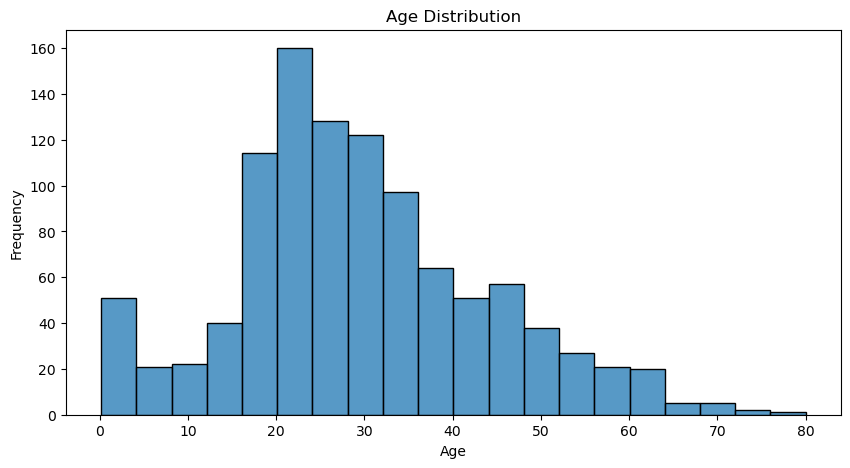

In [1077]:
#Age Distribution
plt.figure(figsize=(10,5))
sns.histplot(data['Age'],bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [1078]:
data[['Pclass','Age']]

,Pclass,Age
0,3,22.0
1,1,38.0
2,3,26.0
3,1,35.0
4,3,35.0
...,...,...
1304,3,NaN
1305,1,39.0
1306,3,38.5
1307,3,NaN


In [1079]:
#survival rate by class
survival_by_class=data.groupby('Pclass')['Survived'].mean()*100
survival_by_class


Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

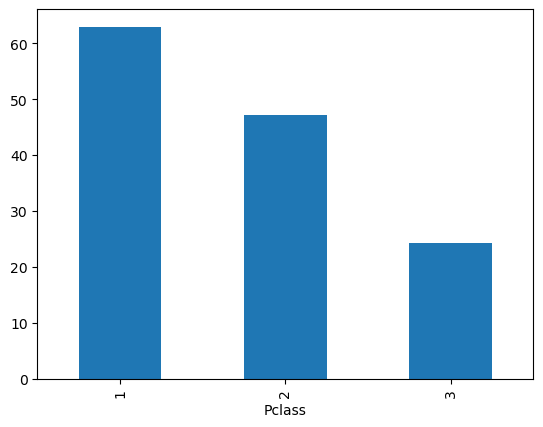

In [1131]:
survival_by_class.plot(kind='bar');

In [1080]:
data.groupby('Pclass')['Age'].head()

0     22.0
1     38.0
2     26.0
3     35.0
4     35.0
5      NaN
6     54.0
7      2.0
9     14.0
11    58.0
15    55.0
17     NaN
20    35.0
21    34.0
23    28.0
Name: Age, dtype: float64

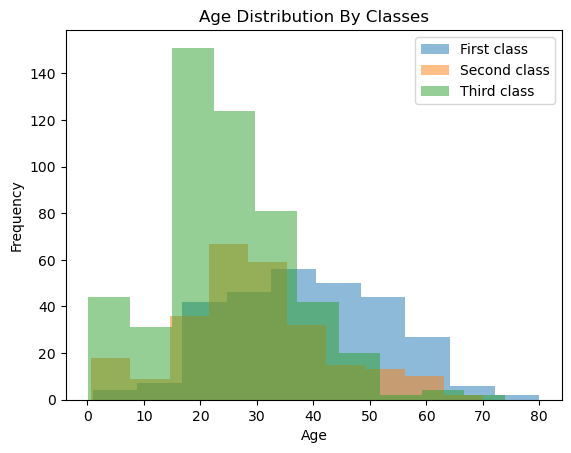

In [1081]:
#Age distribution difference between classes
Classes={1:'First class',2:'Second class',3:'Third class'}
for Class_val, val in data.groupby('Pclass')['Age']:
    plt.hist(val, alpha=0.5, label=Classes[Class_val])
plt.title('Age Distribution By Classes')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [1082]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,NaN,S
1305,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C105,C
1306,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,NaN,S
1307,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,NaN,S


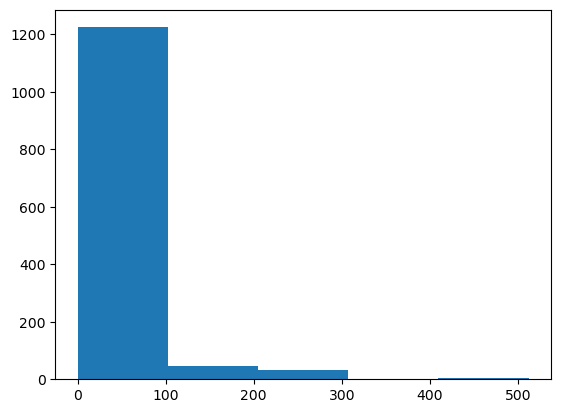

In [1139]:
#3. Fare Distribution
data['Fare'].hist(bins=5,grid=False);

In [1084]:
data['Fare'].describe

<bound method NDFrame.describe of 0         7.2500
1        71.2833
2         7.9250
3        53.1000
4         8.0500
          ...   
1304      8.0500
1305    108.9000
1306      7.2500
1307      8.0500
1308     22.3583
Name: Fare, Length: 1309, dtype: float64>

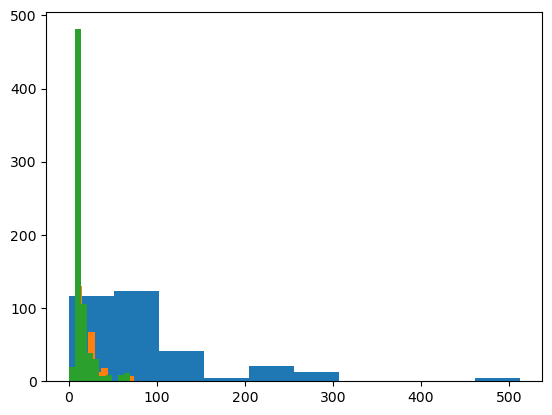

In [1085]:
##difference in fare distributions between classes
data.groupby('Pclass')['Fare'].hist(grid=False);

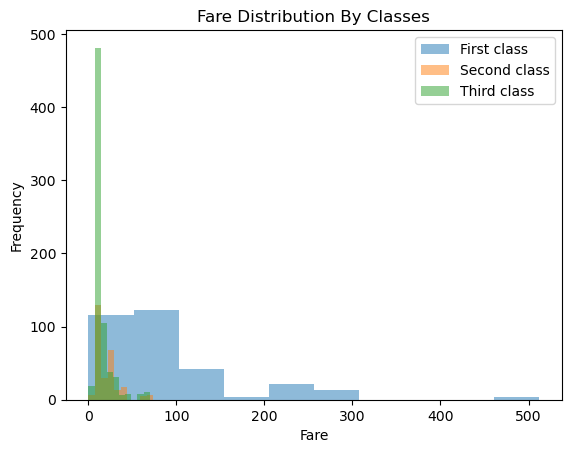

In [1086]:
#Or
#plotting and grouping data by class
Classes={1:'First class',2:'Second class',3:'Third class'}
for Class_val, val in data.groupby('Pclass')['Fare']:
    plt.hist(val, alpha=0.5, label=Classes[Class_val])
plt.title('Fare Distribution By Classes')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [1087]:
#4 Family Relationships
data['Family']=data['SibSp']+data['Parch']

In [1088]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked', 'Family'],
      dtype='object')

In [1089]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,1
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,1
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,0
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,1
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,NaN,S,0
1305,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C105,C,0
1306,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,NaN,S,0
1307,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,NaN,S,0


In [1090]:
#Proportion of passengers with family
proportion_with_family=(data[data['Family']>0].shape[0]/data.shape[0])*100
print (f"Proportion of Passengers with family: {proportion_with_family:.4f}%")

Proportion of Passengers with family: 39.6486%


In [1091]:

1
#Proportion of passengers with family
2
proportion_with_family=(data[data['Family']>0].shape[0]/data.shape[0])*100
3
print (f"Proportion of Passengers with family: {proportion_with_family:.4f}%")
Proportion of Passengers with family: 39.6486%
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,1
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,1
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,0
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,1
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,NaN,S,0
1305,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C105,C,0
1306,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,NaN,S,0
1307,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,NaN,S,0


In [1092]:
##Survival Rate by presence of Family

survival_with_family = data[data['Family']>0]['Survived'].mean()*100
survival_without_family = data[data['Family']==0]['Survived'].mean()*100
print(f'survival rate for people with family:  {survival_with_family: .2f}%')
print(f'survival rate for people without family:  {survival_without_family: .2f}%')

survival rate for people with family:   50.56%
survival rate for people without family:   30.35%


In [1093]:
##Embarkation Port
#Distribution of Passengers by Port
Passengers_by_port = data['Embarked'].value_counts()
Passengers_by_port

Embarked
S    914
C    270
Q    123
Name: count, dtype: int64

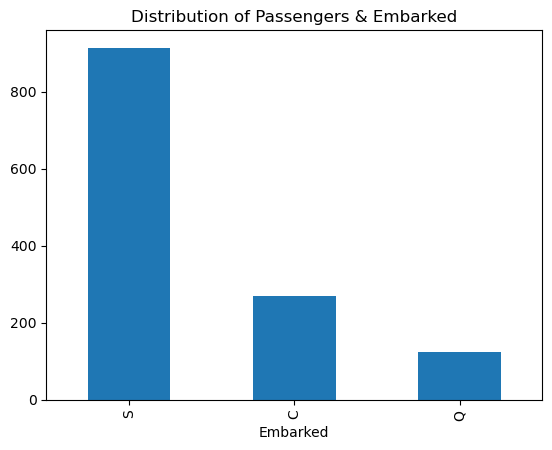

In [1094]:
Passengers_by_port.plot(kind='bar')
plt.title('Distribution of Passengers & Embarked');

In [1095]:
##Correlation between Port and Survival
port_survival_correlation=data.groupby('Embarked')['Survived'].mean()
port_survival_correlation

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

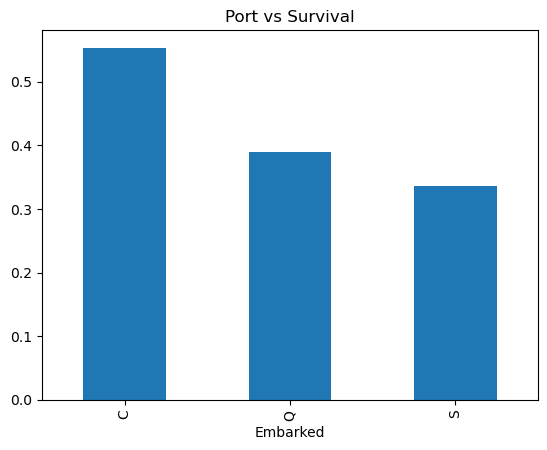

In [1096]:
port_survival_correlation.plot(kind='bar')
plt.title('Port vs Survival');

In [1097]:
##6 Cabin Class and Survival
##Survival Rate by Cabin Class
survival_by_cabin_class=data.groupby('Pclass')['Survived'].mean()*100
survival_by_cabin_class

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

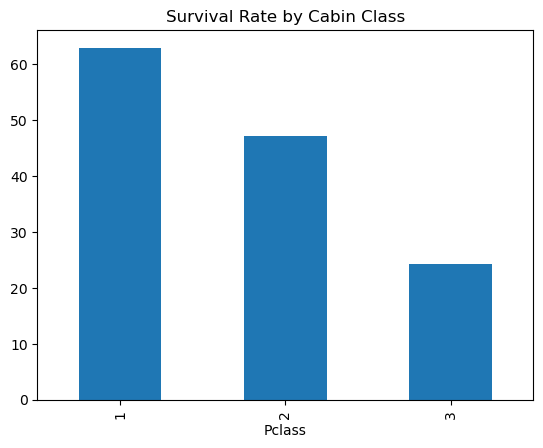

In [1098]:
survival_by_cabin_class.plot(kind='bar')
plt.title('Survival Rate by Cabin Class');

In [1099]:
#7 Name analysis
## extracting data from titles
data['Title']=data['Name'].str.extract('([A-Za-z]+)\.',expand=False)
title_survival_correlation=data.groupby('Title')['Survived'].mean()
title_survival_correlation

Title
Capt        0.000000
Col         0.500000
Countess    1.000000
Don         0.000000
Dona             NaN
Dr          0.428571
Jonkheer    0.000000
Lady        1.000000
Major       0.500000
Master      0.575000
Miss        0.697802
Mlle        1.000000
Mme         1.000000
Mr          0.156673
Mrs         0.792000
Ms          1.000000
Rev         0.000000
Sir         1.000000
Name: Survived, dtype: float64

In [1111]:
data['Title'].value_counts()

Title
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64

In [1145]:
##8. Missing Data
#the extent of missing data
missing_data=data.isnull().sum()
missing_data

Survived     418
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Fare           1
Cabin       1014
Embarked       2
Family         0
Title          0
dtype: int64

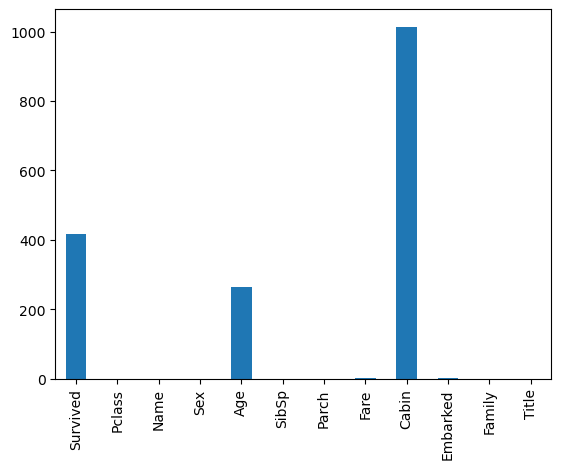

In [1113]:
missing_data.plot(kind='bar');

In [1114]:
# handling missing data
##The missing data for age can be sorted by imputing Mean/median age or predictive models
##For cabin,it can be dropped due to so much data being missed.
##For Embarked, using the mode value or other meaningful approaches for imputation.

In [1115]:
data.head(4)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family,Title
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,1,Mr
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,1,Mrs
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,0,Miss
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,1,Mrs


In [1116]:
data['Title'].value_counts()

Title
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64

In [1117]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked', 'Family', 'Title'],
      dtype='object')

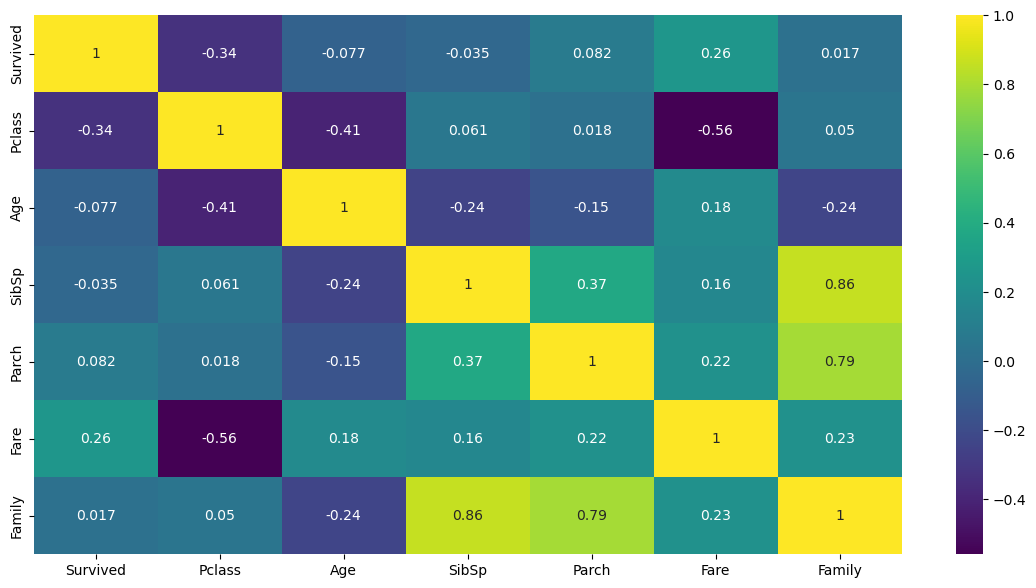

In [1118]:
import seaborn as sns
plt.figure(figsize=(14,7))
sns.heatmap(data[['Survived','Pclass','Age','SibSp','Parch','Fare','Family']].corr(),annot=True,cmap='viridis');

In [1119]:
##The strongest correlation with survival
strongest_survival_correlations = data[['Survived', 'Pclass', 'Age', 'SibSp',
'Parch', 'Fare', 'Family']].corr()['Survived'].sort_values(ascending=False)
strongest_survival_correlations

Survived    1.000000
Fare        0.257307
Parch       0.081629
Family      0.016639
SibSp      -0.035322
Age        -0.077221
Pclass     -0.338481
Name: Survived, dtype: float64

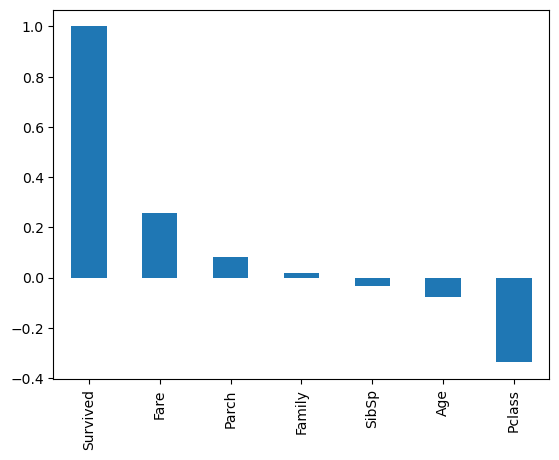

In [1120]:
strongest_survival_correlations.plot(kind='bar');

In [1121]:
#program to check where cells in 'Survived' is not equal to zero
x=((data['Survived']!=0)&(data['Survived']!=1))
data[x]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family,Title
891,NaN,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,NaN,Q,0,Mr
892,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,NaN,S,1,Mrs
893,NaN,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,NaN,Q,0,Mr
894,NaN,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,NaN,S,0,Mr
895,NaN,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,NaN,S,2,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,NaN,S,0,Mr
1305,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C105,C,0,Dona
1306,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,NaN,S,0,Mr
1307,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,NaN,S,0,Mr


In [1122]:
data[~x]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family,Title
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,1,Mr
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,1,Mrs
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,0,Miss
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,1,Mrs
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,NaN,S,0,Rev
887,1.0,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B42,S,0,Miss
888,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,NaN,S,3,Miss
889,1.0,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C148,C,0,Mr


In [1124]:
data['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  , 22.5 ,
       18.5 , 67.  , 76.  , 26.5 , 60.5 , 11.5 ,  0.33,  0.17, 38.5 ])